In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/swag2001/dmdw.18cse071/main/student-mat.csv")
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,NaN,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,NaN,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,NaN,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,NaN,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,NaN,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


# DISSIMILARITY MATRIX FOR BINARY ATTRIBUTES

In [3]:
dfs=df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]
dfs.head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no


In [4]:
dfs=dfs.replace('no',0)
dfs=dfs.replace(to_replace='yes',value=1)
dfs.head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [5]:
n=np.array(dfs[['schoolsup','famsup']])
n=n.reshape(-1,2)
n.shape

(395, 2)

In [6]:
m=np.array(dfs[['romantic','internet']])
m=m.reshape(-1,2)
m.shape

(395, 2)

In [7]:
from scipy.spatial import distance

In [8]:
dis_matrix=distance.cdist(n,m)
dis_matrix.shape

(395, 395)

In [9]:
print(dis_matrix)

[[1.         1.41421356 1.41421356 ... 1.         1.41421356 1.41421356]
 [1.         0.         0.         ... 1.         0.         0.        ]
 [1.         1.41421356 1.41421356 ... 1.         1.41421356 1.41421356]
 ...
 [0.         1.         1.         ... 0.         1.         1.        ]
 [0.         1.         1.         ... 0.         1.         1.        ]
 [0.         1.         1.         ... 0.         1.         1.        ]]


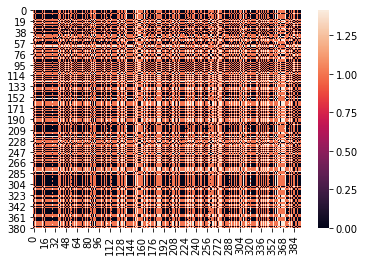

In [10]:
sbs.heatmap(dis_matrix)
plt.show()

# DISSIMILARITY MATRIX FOR NUMERICAL ATTRIBUTES

In [13]:
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,NaN,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,NaN,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,NaN,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,NaN,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,NaN,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
num=df[['age','Medu','Fedu','traveltime','studytime','failures']]
num.head()

,age,Medu,Fedu,traveltime,studytime,failures
0,18,4,4,2,2,0
1,17,1,1,1,2,0
2,15,1,1,1,2,3
3,15,4,2,1,3,0
4,16,3,3,1,2,0


In [16]:
num1=np.array(num[['age','failures']])
num1.reshape(-1,2)
num1.shape

(395, 2)

In [17]:
num2=np.array(num[['Fedu','Medu']])
num2.reshape(-1,2)
num2.shape

(395, 2)

In [18]:
dis_matrix1=distance.cdist(num1,num2)
print(dis_matrix1)

[[14.56021978 17.02938637 17.02938637 ... 17.02938637 16.2788206
  17.02938637]
 [13.60147051 16.03121954 16.03121954 ... 16.03121954 15.29705854
  16.03121954]
 [11.04536102 14.14213562 14.14213562 ... 14.14213562 13.
  14.14213562]
 ...
 [17.02938637 20.09975124 20.09975124 ... 20.09975124 19.
  20.09975124]
 [14.56021978 17.02938637 17.02938637 ... 17.02938637 16.2788206
  17.02938637]
 [15.5241747  18.02775638 18.02775638 ... 18.02775638 17.2626765
  18.02775638]]


# DISSIMILARITY MATRIX FOR NOMINAL ATTRIBUTES

In [19]:
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,NaN,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,NaN,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,NaN,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,NaN,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,NaN,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [20]:
nom=df[['Mjob','Fjob','reason','guardian']]
nom.head()

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
2,at_home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [21]:
nom=nom.replace('at_home','home')
nom.head()

,Mjob,Fjob,reason,guardian
0,home,teacher,course,mother
1,home,other,course,father
2,home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [22]:
nom=nom.astype('category')

In [23]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [24]:
nom['guardian']=lb.fit_transform(nom['guardian'])
nom['Mjob']=lb.fit_transform(nom['Mjob'])
nom['Fjob']=lb.fit_transform(nom['Fjob'])
nom['reason']=lb.fit_transform(nom['reason'])

In [25]:
nom.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0


In [27]:
nom1=np.array(nom)
nom1.reshape(-1,2)
nom1.shape

(395, 4)

In [28]:
nom2=np.array(nom)
nom2.reshape(-1,2)
nom2.shape

(395, 4)

In [29]:
dis_matrix2=distance.cdist(nom1,nom2)
print(dis_matrix)

[[1.         1.41421356 1.41421356 ... 1.         1.41421356 1.41421356]
 [1.         0.         0.         ... 1.         0.         0.        ]
 [1.         1.41421356 1.41421356 ... 1.         1.41421356 1.41421356]
 ...
 [0.         1.         1.         ... 0.         1.         1.        ]
 [0.         1.         1.         ... 0.         1.         1.        ]
 [0.         1.         1.         ... 0.         1.         1.        ]]
